<a href="https://colab.research.google.com/github/emmanueltiti/week-6-ip/blob/main/week_6ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 2

## 1. Defining the Question

### a) Specifying the Question

Devicing a method of predicting amatch winner for Mchezopesa Ltd taking into account each teams rank (home and away team) and the type of tournament.



### b) Defining the Metric for Success

Finding appropriate predictions for our test data.

### c) Understanding the context 

### e) Data Relevance
Data being used for this problem solving seems to contain all necesarry features for creating the intended prediction model.

## 2. Reading the Data

In [125]:
#importing relevant libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as plt
# Loading the the first data set of fifa ranking 
df_rank=pd.read_csv('fifa_ranking.csv')
df_rank.head()



,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [126]:
#loading th result data set
df_result=pd.read_csv('results.csv')
df_result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Checking the Data

In [127]:
# Determining the no. of records in our rank dataset
df_result.shape

(40839, 9)

In [128]:
# Checking whether each column has an appropriate datatype
df_result.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [129]:
df_result.nunique().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64>

In [130]:
#df_result.dtypes
#we change the date from objest to datetime64
df_result['date'].astype('datetime64')
df_result.dtypes


date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [131]:
df_rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

## 5. Tidying the Dataset

In [132]:
df_rank.isnull().sum()
#rank dara set also has no null values 

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [133]:
df_result.isnull().sum()
#The resuld data set has no null values 

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

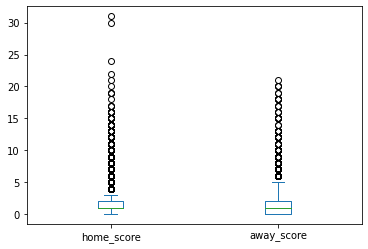

In [134]:
# Checking for Outliers
#here we cab use box plots for the results dataset
df_result.plot(kind="box")
#our data set has values out side our quatile range ie. outliers


**Outliers**  

From the box plot above we see that we have values outside our quatile range .These records are valid but it may affect both the variance and mean of our dataset.
To solve this we migh set our maximum values in the score columns for our result data set as 10 goals and drop other rows with records higher than 10. 

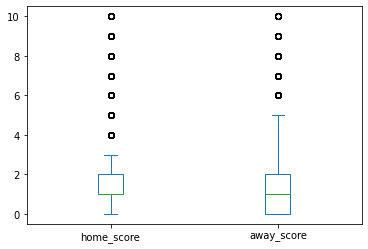

In [135]:
#here we drop rows withnvalues greater than 10
df_result.drop(df_result[df_result['home_score'] > 10].index, inplace = True)
df_result.drop(df_result[df_result['away_score'] > 10].index, inplace = True)
df_result.plot(kind="box")


## 6. Exploratory Analysis

**Univariate analysis**

Here we could try and view distributions in our dataset

In [136]:
#we can try to see apperences or count of matches played by all individual teams at home
df_result['home_team'].value_counts().nunique
#Agentina has played most home  matches 

<bound method IndexOpsMixin.nunique of Brazil           563
Argentina        543
Mexico           510
Germany          499
England          488
                ... 
Madrid             1
Palau              1
Kiribati           1
Romani people      1
Curacao            1
Name: home_team, Length: 305, dtype: int64>

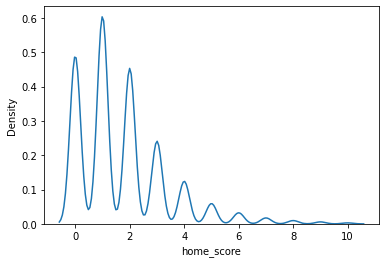

In [137]:
import matplotlib.pyplot as plt

sns.kdeplot(df_result['home_score'])
#distribution of the home  score column is left skewed meaning mean is lee then the mode and hase multiple peaks 

In [138]:
df_result['away_team'].value_counts().nunique
#sweden has the most played away ganes 

<bound method IndexOpsMixin.nunique of Uruguay               536
Sweden                527
England               503
Hungary               471
Paraguay              448
                     ... 
Central Spain           1
Barawa                  1
Parishes of Jersey      1
Corsica                 1
Manchukuo               1
Name: away_team, Length: 305, dtype: int64>

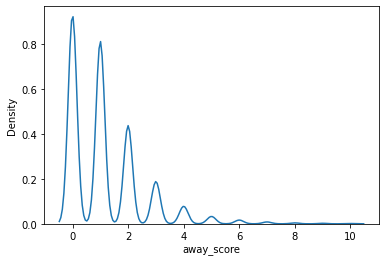

In [139]:
sns.kdeplot(df_result['away_score'])
#distribution of the away score column is left skewed meaning mean is lee then the mode and hase multiple peaks 

In [140]:
#lets see which tournaments has most games
df_result['tournament'].value_counts().nunique


<bound method IndexOpsMixin.nunique of Friendly                                16882
FIFA World Cup qualification             7074
UEFA Euro qualification                  2429
African Cup of Nations qualification     1616
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
World Unity Cup                             4
Copa América qualification                  2
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Name: tournament, Length: 109, dtype: int64>

Feature engineering

Here we will create a column the will contain match status  ie. whether the game was a win ,a draw or a loss to the home team.
This column will be use as our dependent variable and will be essential for building our prediction models.

In [141]:
#To start off, we create a column: status, whose values will be either win ,draw or loss
#to do this we will create this column with results from the away_score and home score columns 
#a draw is when away_score column value ==home_score column value,wins is when home_score>away_score and loss is a negation of the latter 
def outcome(row):
  if row['home_score']==row['away_score']:
   return 'draw'
  elif row['home_score']>row['away_score']:
   return 'win'
  elif row['home_score']<row['away_score']:
   return 'loss' 
df_result['status']=df_result.apply(lambda row: outcome(row), axis=1) 
df_result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win


Before hot encoding our data for machine learning,we first drop columns we wont use as our independent variables 

In [142]:
#
df_new=df_result.drop(['date', 'city', 'country', 'neutral', 'home_score', 'away_score'], axis = 1)
df_new.head()

,home_team,away_team,tournament,status
0,Scotland,England,Friendly,draw
1,England,Scotland,Friendly,win
2,Scotland,England,Friendly,win
3,England,Scotland,Friendly,draw
4,Scotland,England,Friendly,win


In [143]:
#we can now hot encode the new data frame
pd.get_dummies(df_new,drop_first=True).shape

(40685, 718)

Results from the above colum return numerous column due to the many labels in each column.To solve this we would need to make one binary variable 10 of the most frequent labels


In [144]:
#lets check the number of labels in each column
for col in df_new.columns:
   print(col, ':', len(df_new[col].unique()),'labels')

home_team : 305 labels
away_team : 305 labels
tournament : 109 labels
status : 3 labels


In [145]:
#to most frequent lebels in the home team column
df_new['home_team'].value_counts().sort_values(ascending=False).head(10)

Brazil         563
Argentina      543
Mexico         510
Germany        499
England        488
Sweden         481
France         480
South Korea    462
Hungary        447
Italy          441
Name: home_team, dtype: int64

In [146]:
#lets make alist of the top 10 frequent categories 
top_10=[x for x in df_new['home_team'].value_counts().sort_values(ascending=False).head(10).index]
top_10

['Brazil',
 'Argentina',
 'Mexico',
 'Germany',
 'England',
 'Sweden',
 'France',
 'South Korea',
 'Hungary',
 'Italy']

In [147]:
for label in top_10:
 df_new[label]=np.where(df_new['home_team']==label,1,0)
df_new[['home_team']+top_10].head(20)

,home_team,Brazil,Argentina,Mexico,Germany,England,Sweden,France,South Korea,Hungary,Italy
0,Scotland,0,0,0,0,0,0,0,0,0,0
1,England,0,0,0,0,1,0,0,0,0,0
2,Scotland,0,0,0,0,0,0,0,0,0,0
3,England,0,0,0,0,1,0,0,0,0,0
4,Scotland,0,0,0,0,0,0,0,0,0,0
5,Scotland,0,0,0,0,0,0,0,0,0,0
6,England,0,0,0,0,1,0,0,0,0,0
7,Wales,0,0,0,0,0,0,0,0,0,0
8,Scotland,0,0,0,0,0,0,0,0,0,0
9,Scotland,0,0,0,0,0,0,0,0,0,0


We now have to repeat the whole process for the entire data set

In [148]:
#to achieve this we define a function
def one_hot_to_x(df_name,column_name,top_x):
  for label in top_x:
    df_name[column_name+'_'+label]=np.where(df_name[column_name]==label,1,0)

one_hot_to_x(df_new,'away_team',top_10)
one_hot_to_x(df_new,'tournament',top_10)
df_new.head()

,home_team,away_team,tournament,status,Brazil,Argentina,Mexico,Germany,England,Sweden,France,South Korea,Hungary,Italy,away_team_Brazil,away_team_Argentina,away_team_Mexico,away_team_Germany,away_team_England,away_team_Sweden,away_team_France,away_team_South Korea,away_team_Hungary,away_team_Italy,tournament_Brazil,tournament_Argentina,tournament_Mexico,tournament_Germany,tournament_England,tournament_Sweden,tournament_France,tournament_South Korea,tournament_Hungary,tournament_Italy
0,Scotland,England,Friendly,draw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,England,Scotland,Friendly,win,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Scotland,England,Friendly,win,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,England,Scotland,Friendly,draw,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Scotland,England,Friendly,win,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 7. Implementing the Solution

In [149]:
#we hence drop the columns replaced
df_useful=df_new.drop(['home_team', 'away_team', 'tournament'], axis = 1)
df_useful

,status,Brazil,Argentina,Mexico,Germany,England,Sweden,France,South Korea,Hungary,Italy,away_team_Brazil,away_team_Argentina,away_team_Mexico,away_team_Germany,away_team_England,away_team_Sweden,away_team_France,away_team_South Korea,away_team_Hungary,away_team_Italy,tournament_Brazil,tournament_Argentina,tournament_Mexico,tournament_Germany,tournament_England,tournament_Sweden,tournament_France,tournament_South Korea,tournament_Hungary,tournament_Italy
0,draw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,win,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,win,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,draw,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,win,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,win,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40835,draw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40836,loss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40837,loss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


For the three seperste classes we could replace each with a digit to ie. win replace with 1,loss wth 0 and draw with 2

In [150]:
df_useful['status']=df_useful['status'].replace({'win':1,'loss':2, 'draw':3})
df_useful.head()

,status,Brazil,Argentina,Mexico,Germany,England,Sweden,France,South Korea,Hungary,Italy,away_team_Brazil,away_team_Argentina,away_team_Mexico,away_team_Germany,away_team_England,away_team_Sweden,away_team_France,away_team_South Korea,away_team_Hungary,away_team_Italy,tournament_Brazil,tournament_Argentina,tournament_Mexico,tournament_Germany,tournament_England,tournament_Sweden,tournament_France,tournament_South Korea,tournament_Hungary,tournament_Italy
0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [151]:
#we then import library requried for perfoming thentest
from sklearn.model_selection import train_test_split
X=df_useful.drop('status', axis=1)
y=df_useful['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [152]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [153]:
# Using our model to make a prediction
#this are predictions from aour test data
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 1, ..., 2, 1, 1])

In [154]:
X_test
#this are the x variables for our test data

,Brazil,Argentina,Mexico,Germany,England,Sweden,France,South Korea,Hungary,Italy,away_team_Brazil,away_team_Argentina,away_team_Mexico,away_team_Germany,away_team_England,away_team_Sweden,away_team_France,away_team_South Korea,away_team_Hungary,away_team_Italy,tournament_Brazil,tournament_Argentina,tournament_Mexico,tournament_Germany,tournament_England,tournament_Sweden,tournament_France,tournament_South Korea,tournament_Hungary,tournament_Italy
30015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22912,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
21210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8806,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[5718,  306,    2],
       [2892,  515,    0],
       [2522,  248,    3]])

Text(24.0, 0.5, 'actual value')

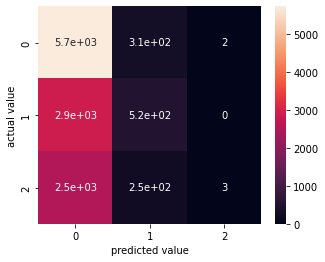

In [156]:
#we can make aplot fot the above matrix to understand it better
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('predicted value')
plt.ylabel('actual value')

for the wins 515 were predicted corectly
5718 losses were also predicted corectly
3 out of five draws were predicted corectly

Cross validation


In [157]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6958872685564477
Mean Squared Error: 1.1094543667048993
Root Mean Squared Error: 1.053306397353068


Running the code above should yield an RMSE of ~ 0.741. Let's now cross validate our model by using k-fold cross validation

In [163]:
from sklearn.model_selection import KFold
X=df_useful.drop('status', axis=1).values
y=df_useful['status'].values
folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
 print('\nTraining model ' + str(count))
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
 regressor = LinearRegression()  
 regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
 y_pred = regressor.predict(X_test)
  
 rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
 RMSES.append(rmse_value)
  
  
 print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
 count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.7721658509040475

Training model 2
Model 2 Root Mean Squared Error: 0.8154246335446631

Training model 3
Model 3 Root Mean Squared Error: 0.8179425863463616

Training model 4
Model 4 Root Mean Squared Error: 0.8076868177148462

Training model 5
Model 5 Root Mean Squared Error: 0.8084511766645849


In [164]:
np.mean(RMSES)

0.8043342130349007

The mean RSMSES from our fold is relatively larger this may be due to most of the outliers beimg im the selected folds.

RMSE value plot visualization

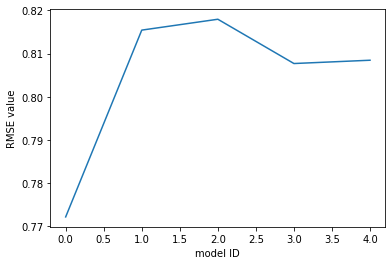

In [165]:
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

## 8. Challenging the solution

from the Rsme calculated it is evident that our out liers are causing noticable variance hence the difference in the values gotten from k folds .Dealing with outliers appropriately or using smaller fold size may solve this difference.





## 9. Follow up questions

### a). Did we have the right data?.

Our data was pretty sufficient to solve our prediction problem

### b). Do we need other data to answer our question?
The data set we had was more than enough